In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [6]:
df_tesla = pd.read_csv("TESLA Search Trend vs Price.csv")
df_btc_search = pd.read_csv("Bitcoin Search Trend.csv")
df_btc_price = pd.read_csv("Daily Bitcoin Price.csv")
df_ue_19 = pd.read_csv("UE Benefits Search vs UE Rate 2004-19.csv")
df_ue_20 = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv")

### TESLA CSV information

In [7]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [8]:
df_tesla.shape

(124, 3)

In [9]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [10]:
df_tesla.isna().values.any()

False

In [11]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)

In [13]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")


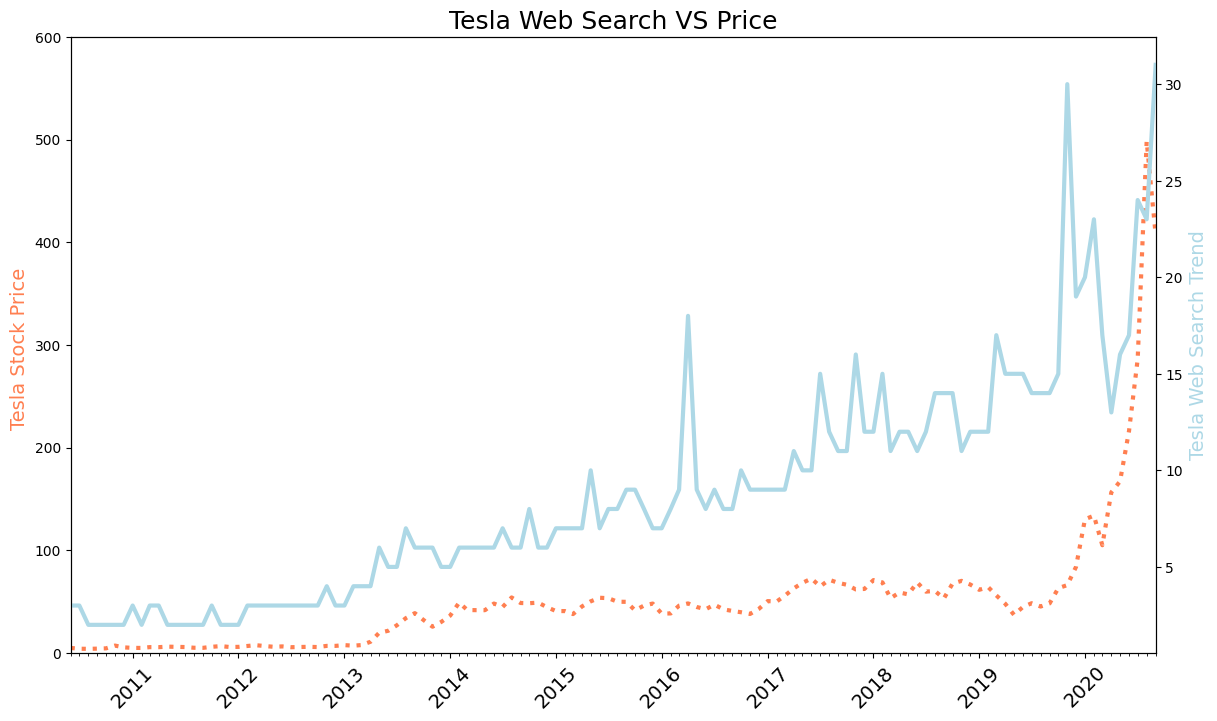

In [19]:
plt.figure(figsize=(14,8))
plt.title("Tesla Web Search VS Price", fontsize= 18)
plt.xticks(fontsize=14, rotation=45)
ax1 = plt.gca()
ax2 = plt.twinx()
ax1.set_ylabel("Tesla Stock Price ", color="coral", fontsize=14)
ax2.set_ylabel("Tesla Web Search Trend", color="lightblue", fontsize=14)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="coral", linewidth=3, linestyle="dotted")
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="lightblue", linewidth=3)

In [20]:
df_tesla.MONTH.head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

## BTC

In [21]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [22]:
df_btc_price.shape

(2204, 3)

In [23]:
df_btc_price.columns

Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

In [24]:
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [25]:
df_btc_price.DATE.head()

0   2014-09-17
1   2014-09-18
2   2014-09-19
3   2014-09-20
4   2014-09-21
Name: DATE, dtype: datetime64[ns]

In [26]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [27]:
df_btc_search.shape

(73, 2)

In [28]:
df_btc_search.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [29]:
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)

In [30]:
df_btc_search.MONTH.head()

0   2014-09-01
1   2014-10-01
2   2014-11-01
3   2014-12-01
4   2015-01-01
Name: MONTH, dtype: datetime64[ns]

#### Resampling Time series Data

In [31]:
df_btc_monthly = df_btc_price.resample("M", on="DATE").last()

In [32]:
df_btc_monthly.shape

(73, 2)

In [33]:
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


#### Btc chart

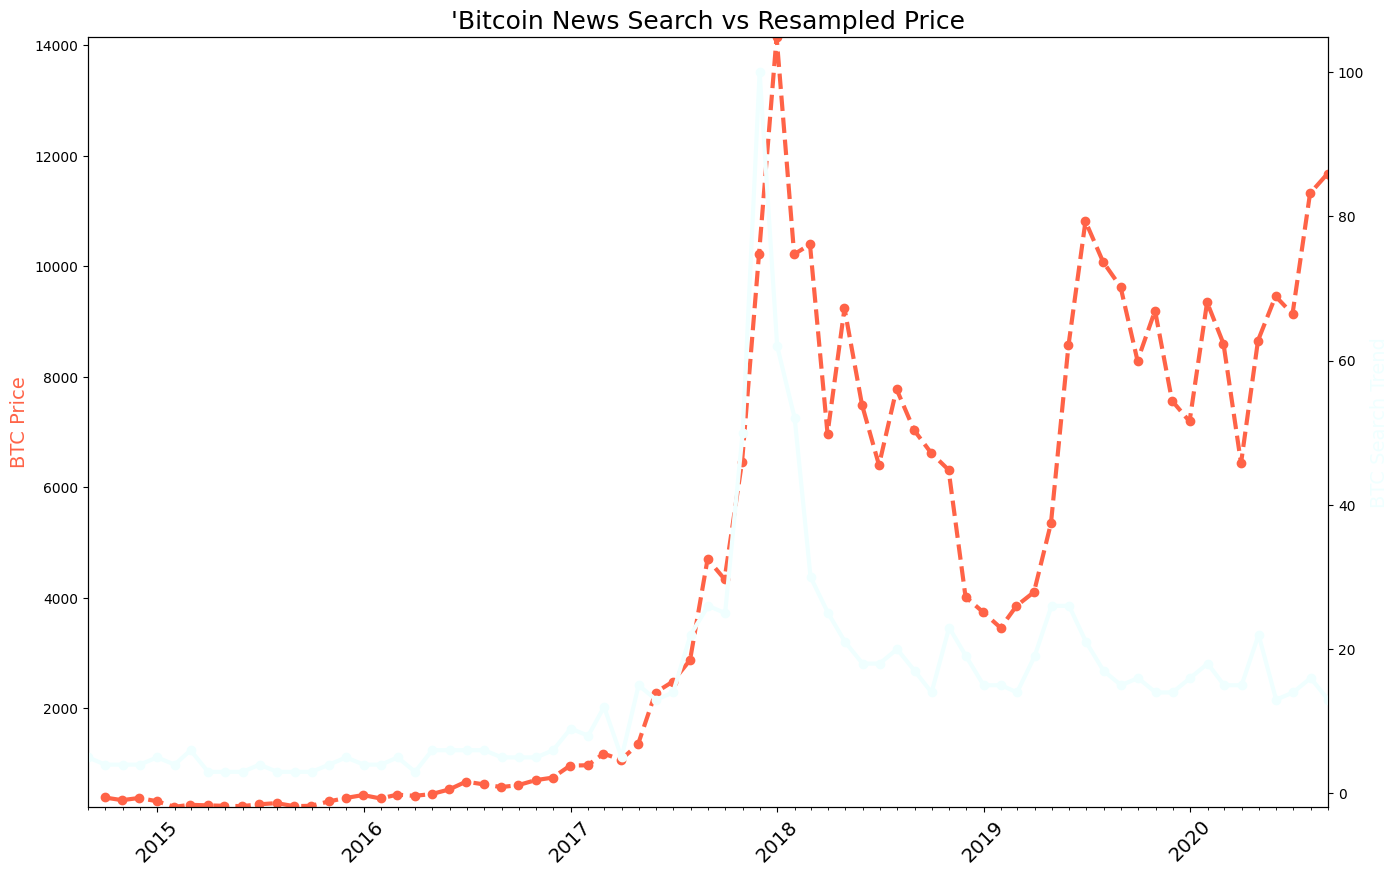

In [42]:
plt.figure(figsize=(16,10))
plt.title("'Bitcoin News Search vs Resampled Price", fontsize=18)
plt.xticks(fontsize=14, rotation=45)
ax1 = plt.gca()
ax2 = plt.twinx()
ax1.set_ylabel("BTC Price", color ="tomato", fontsize=14)
ax2.set_ylabel("BTC Search Trend", color="azure", fontsize=14)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
ax1.set_ylim([df_btc_monthly.CLOSE.min(), df_btc_monthly.CLOSE.max()])
ax1.set_xlim([df_btc_search.MONTH.min(), df_btc_search.MONTH.max()])
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color="tomato", linewidth=3, linestyle="--", marker="o")
ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, color="azure", linewidth=3, marker="o")

## unemployment benefits

In [43]:
df_ue_19.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [44]:
df_ue_20.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [45]:
df_ue_19.shape

(181, 3)

In [46]:
df_ue_20.shape

(200, 3)

In [47]:
df_ue_19.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [48]:
df_ue_20.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [49]:
df_ue_20.MONTH = pd.to_datetime(df_ue_20.MONTH)

In [50]:
df_ue_20.MONTH.head()

0   2004-01-01
1   2004-02-01
2   2004-03-01
3   2004-04-01
4   2004-05-01
Name: MONTH, dtype: datetime64[ns]

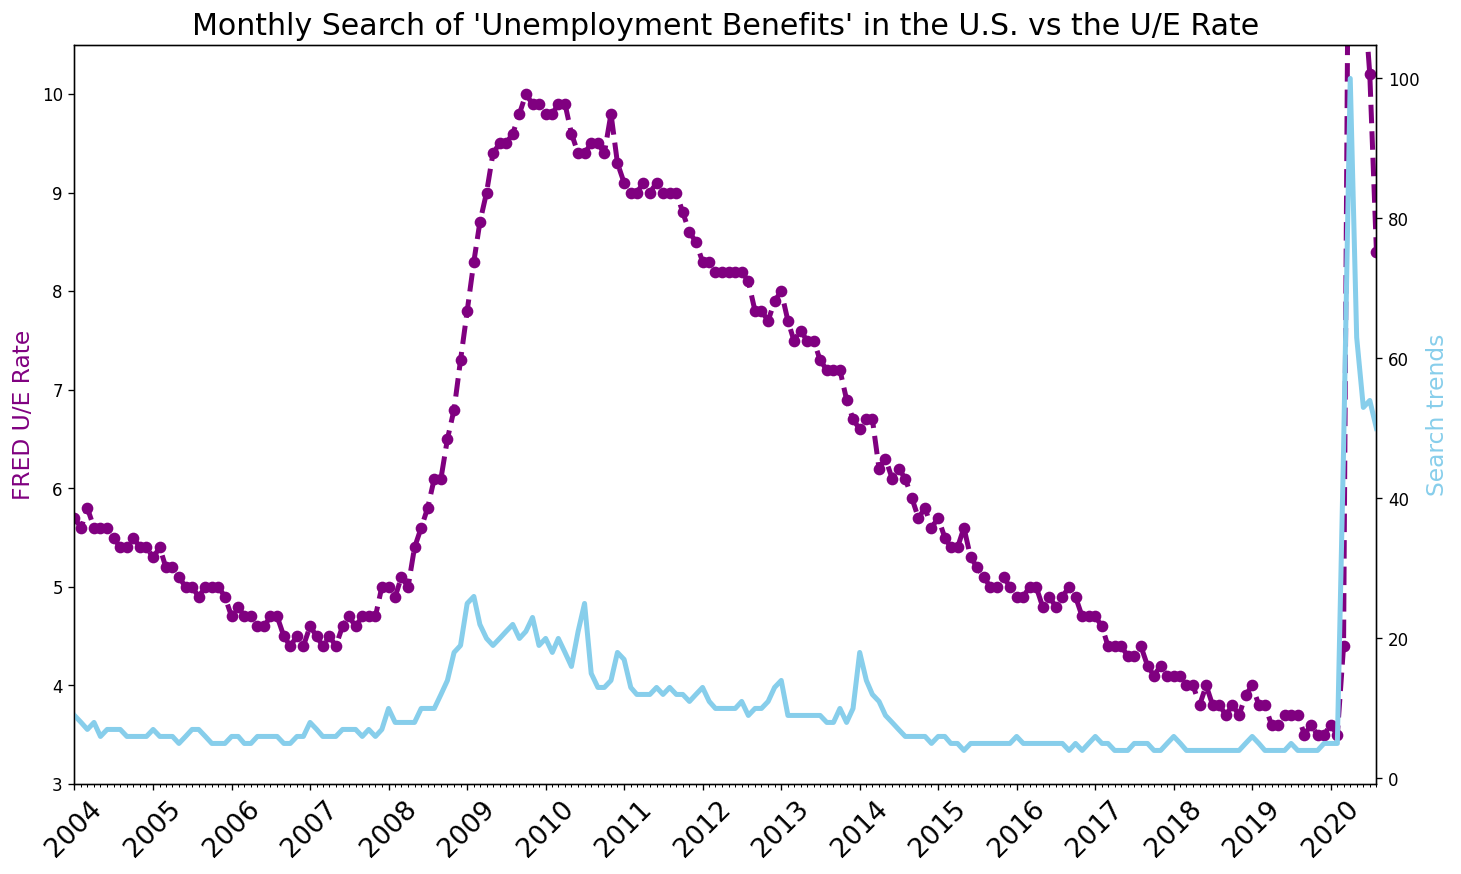

In [52]:
plt.figure(figsize=(14,8),dpi=120)
plt.title("Monthly Search of 'Unemployment Benefits' in the U.S. vs the U/E Rate", fontsize=18)
plt.xticks(fontsize=16, rotation=45)
ax1= plt.gca()
ax2= plt.twinx()
ax1.set_ylabel("FRED U/E Rate", color="purple", fontsize=14)
ax2.set_ylabel("Search trends", color="skyblue", fontsize=14)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_ue_20.MONTH.min(), df_ue_20.MONTH.max()])
ax1.plot(df_ue_20.MONTH, df_ue_20.UNRATE, color="purple", linewidth=3, linestyle="--",
         marker="o")
ax2.plot(df_ue_20.MONTH, df_ue_20.UE_BENEFITS_WEB_SEARCH, color="skyblue", linewidth=3,
        )

In [53]:
df_ue_19.MONTH = pd.to_datetime(df_ue_19.MONTH)

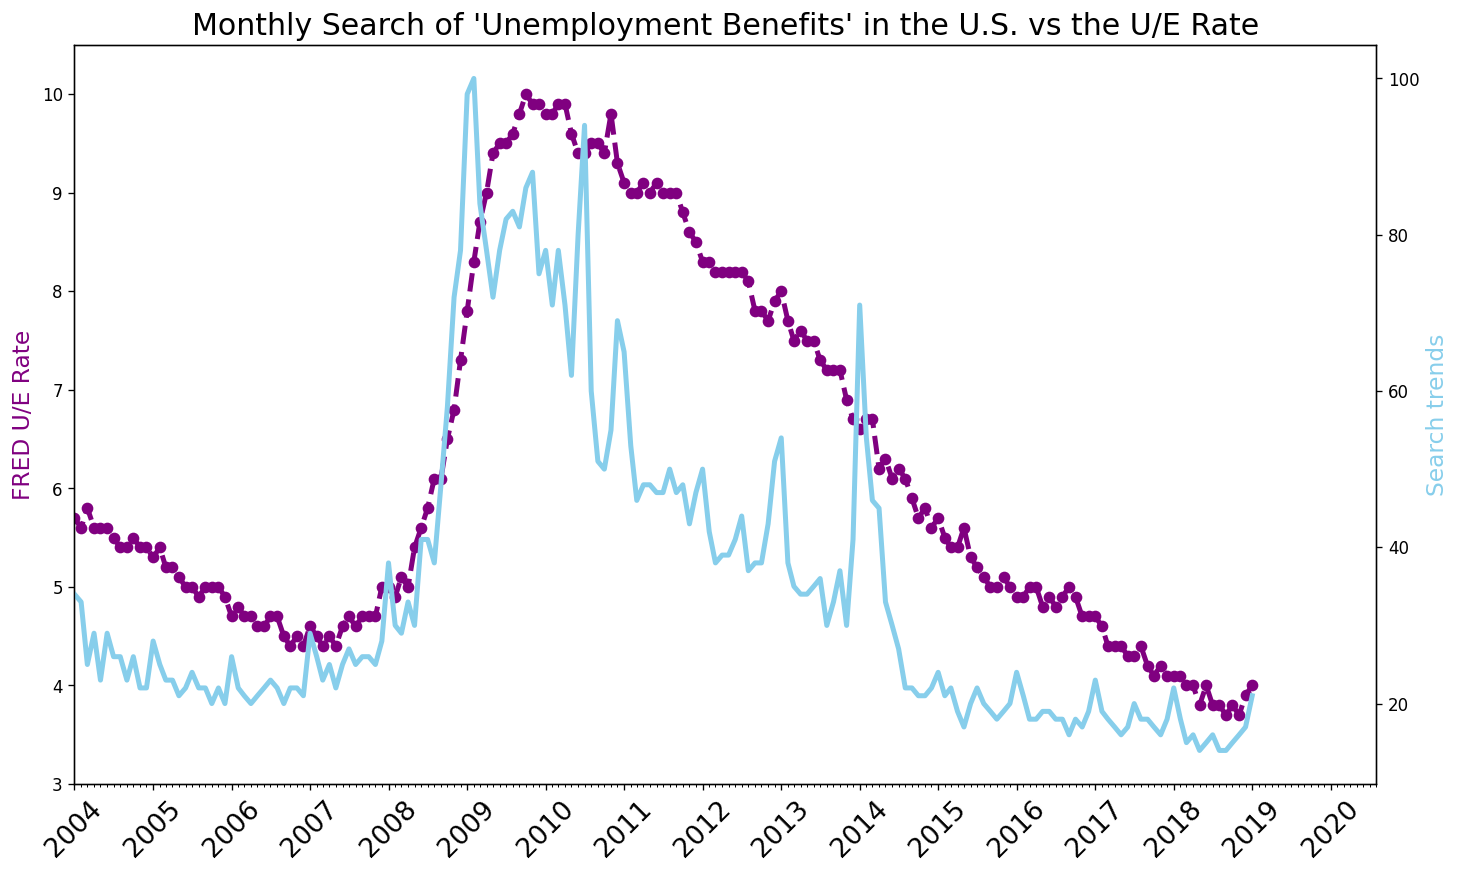

In [55]:
plt.figure(figsize=(14,8),dpi=120)
plt.title("Monthly Search of 'Unemployment Benefits' in the U.S. vs the U/E Rate", fontsize=18)
plt.xticks(fontsize=16, rotation=45)
ax1= plt.gca()
ax2= plt.twinx()
ax1.set_ylabel("FRED U/E Rate", color="purple", fontsize=14)
ax2.set_ylabel("Search trends", color="skyblue", fontsize=14)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_ue_19.MONTH.min(), df_ue_20.MONTH.max()])
ax1.plot(df_ue_19.MONTH, df_ue_19.UNRATE, color="purple", linewidth=3, linestyle="--",
         marker="o")
ax2.plot(df_ue_19.MONTH, df_ue_19.UE_BENEFITS_WEB_SEARCH, color="skyblue", linewidth=3,
        )

In [56]:
roll_df = df_ue_20[["UE_BENEFITS_WEB_SEARCH", "UNRATE"]].rolling(window=6).mean()

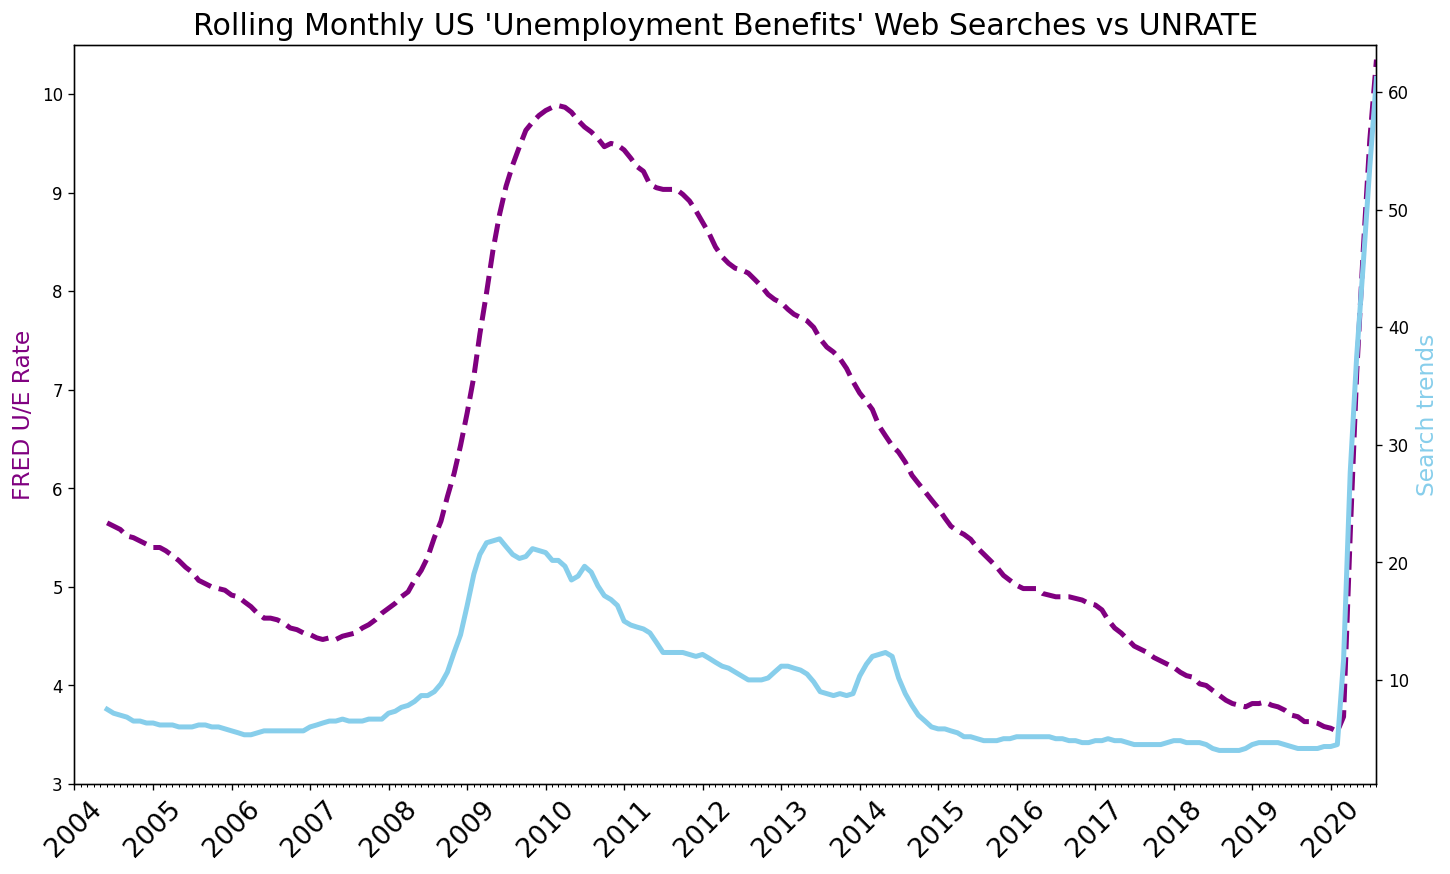

In [59]:
plt.figure(figsize=(14,8),dpi=120)
plt.title("Rolling Monthly US 'Unemployment Benefits' Web Searches vs UNRATE", fontsize=18)
plt.xticks(fontsize=16, rotation=45)
ax1= plt.gca()
ax2= plt.twinx()
ax1.set_ylabel("FRED U/E Rate", color="purple", fontsize=14)
ax2.set_ylabel("Search trends", color="skyblue", fontsize=14)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_ue_20.MONTH.min(), df_ue_20.MONTH.max()])
ax1.plot(df_ue_20.MONTH, roll_df.UNRATE, color="purple", linewidth=3, linestyle="--")
ax2.plot(df_ue_20.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color="skyblue", linewidth=3,
        )